<a href="https://colab.research.google.com/github/buckerslondon/data-playground/blob/master/England_data_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daily data for cases over england by council

In [29]:
import pandas as pd
url = 'https://www.arcgis.com/sharing/rest/content/items/b684319181f94875a6879bbc833ca3a6/data'
# fix any numbers with , in them
df = pd.read_csv(url, thousands=',')
df.index = df['GSS_NM']
df2 = df.drop(columns=['GSS_CD','GSS_NM'])
#just in case of any bad data in the counts
df2.TotalCases = pd.to_numeric(df2.TotalCases, errors='coerce')
df2 = df2.sort_values(by='TotalCases', ascending=False)
print(df2.head(10))

               TotalCases
GSS_NM                   
Birmingham           1246
Hampshire             876
Sheffield             833
Hertfordshire         833
Surrey                811
Essex                 792
Kent                  755
Brent                 728
Lancashire            726
Cumbria               698


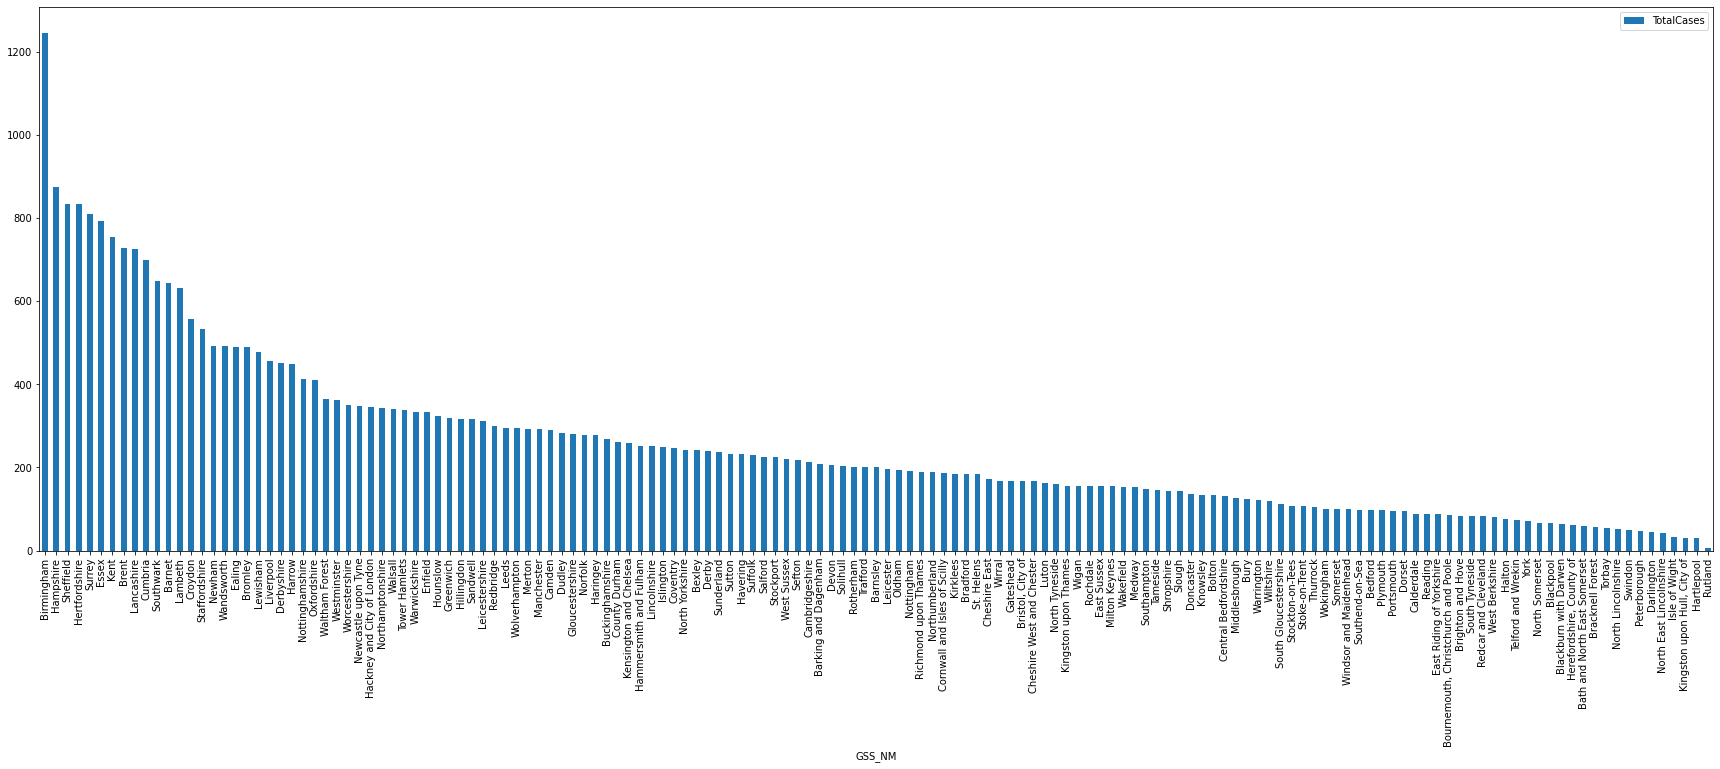

In [30]:
df2.plot(kind='bar', figsize=(30,10))

Get time series data by council - some cases aren't attributable so doesn't square to total england count

In [0]:
url = 'https://fingertips.phe.org.uk/documents/Historic%20COVID-19%20Dashboard%20Data.xlsx'
df = pd.read_excel(url, sheet_name='UTLAs', header=7, index_col=0)

# value missing so set to unconfirmed
df.iloc[0, 0] = 'Unconfirmed'
# move to area name as index rather than the code which is meaningless
df.index = df['Area Name']
df = df.drop(columns=['Area Name']).transpose()
# remove unconfirmed and england as skews everything
cleandf = df.drop(columns=['Unconfirmed', 'England '])
cleandf.index = pd.to_datetime(cleandf.index)

Keeping an eye on wandsworth

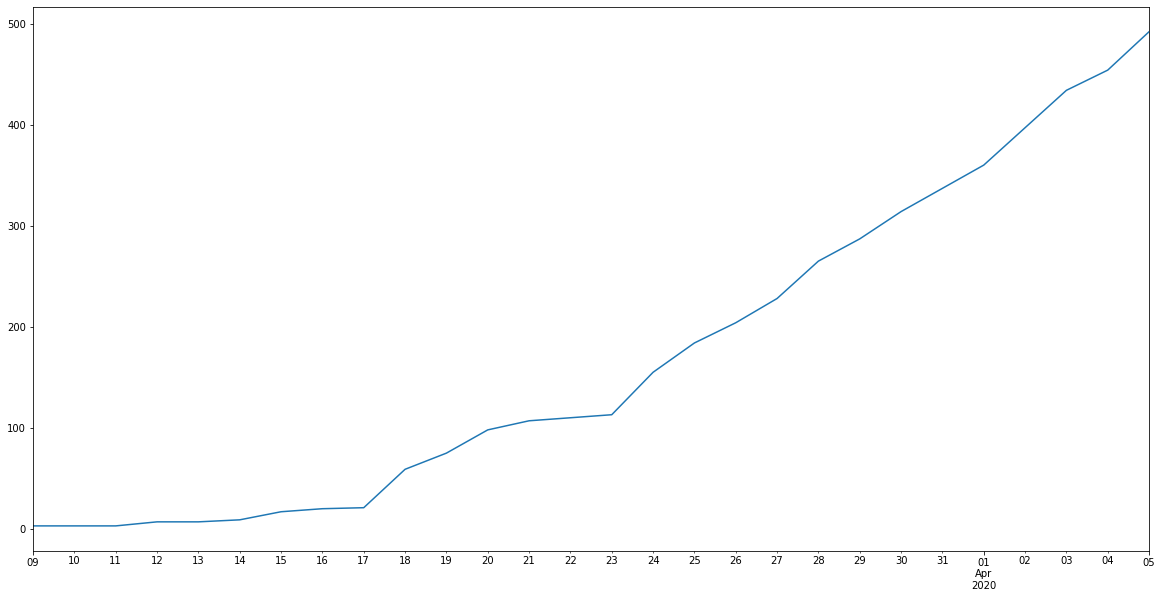

In [12]:
cleandf['Wandsworth'].plot(figsize=(20,10))

Look at top 20 councils based on cumulative cases over timeseries

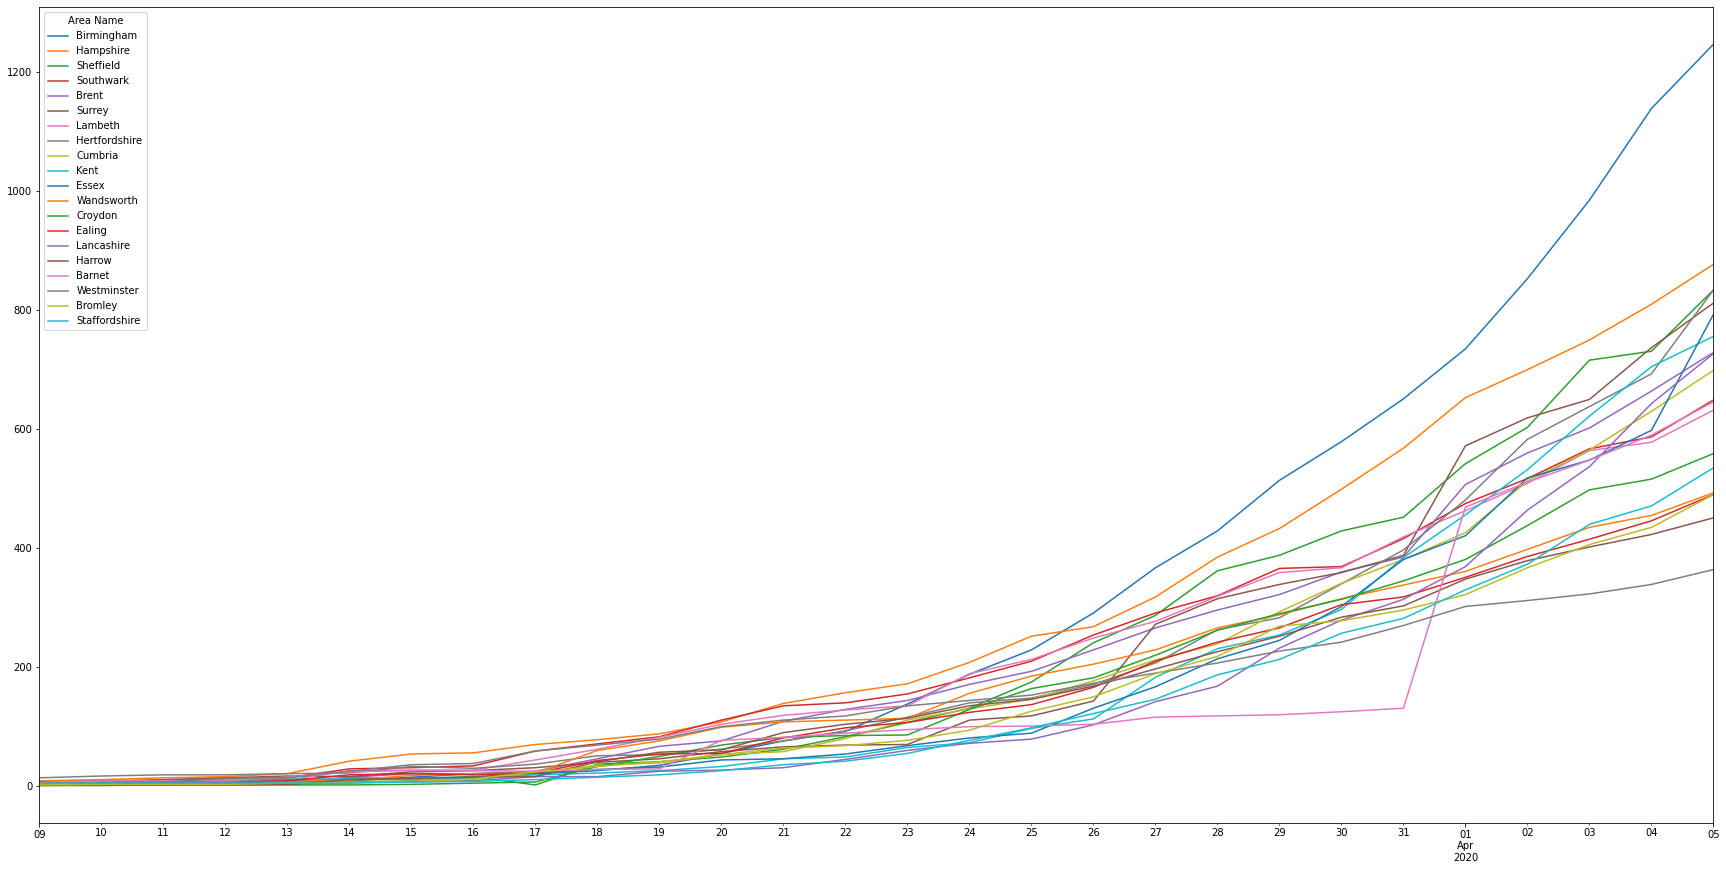

In [13]:
# grab top 20 councils by sum of timeseries
top_councils = cleandf.sum(axis=0).sort_values(ascending=False).head(20).index.to_list()
# plot top 20
cleandf[top_councils].plot(figsize=(30,15))